# MLP Prediction on Alibaba Cloud 2021 Cluster Data

Data

In [15]:
import pandas as pd
df  = pd.read_csv("bigdata.csv")
dataset = df.values
X = dataset[:, 3] # memory column
Y = dataset[:, 2] # cpu column
ID = dataset[:, 1] # node id column

Plotting the Data

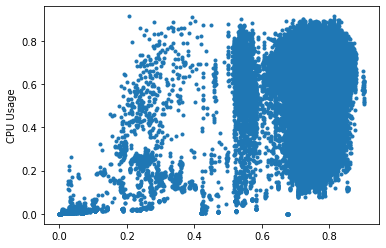

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x=X, y=Y, marker=".")
plt.ylabel("CPU Usage")
plt.show()

Model : Multi Layer Perceptron Neural Network

In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# reshaping the X-factor from 1D to 2D
X = X.reshape(-1, 1)
# splitting the data to train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
# neural network configuration
model = MLPRegressor(solver="adam", alpha=0.49, tol=2.8284271247461903, activation="tanh", learning_rate="adaptive", max_iter=100000)
# fitting the train sets
model.fit(X_train, Y_train)
# prediction
Y_predict = model.predict(X_test)

MSE

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_predict)

0.016882119312855

Plotting the Predicted CPU Usage on Test Data

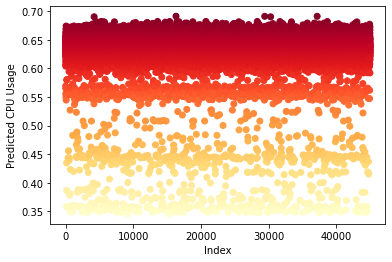

In [19]:
plt.scatter(x=list(range(0, 45000)), y=Y_predict, c=X_test, cmap="YlOrRd")
plt.ylabel("Predicted CPU Usage")
plt.xlabel("Index")
plt.show()
# x-factor = index number of node id
# y-factor = predicted CPU usage of test set nodes

Node ID and their Predicted CPU Usage

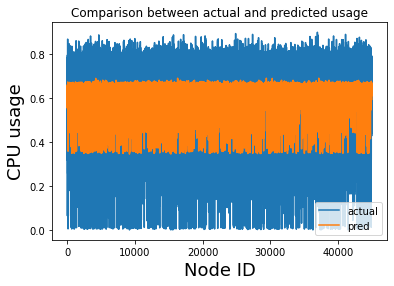

In [20]:
listY_test = list(Y_test)
listID = list(ID)
listY_predict = list(Y_predict)
plt.plot(Y_test, label='actual')
plt.plot(listY_predict, label='pred')
plt.title('Comparison between actual and predicted usage')
plt.ylabel('CPU usage', fontsize=18)
plt.xlabel('Node ID', fontsize=18)
plt.legend()
plt.show()